# Backpropagation

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
import time
np.random.seed(7)

C:\Users\lenovo\Chetan\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Read and preprocess data to impute missing values with NaN
dataset = pd.read_csv("breast-cancer-wisconsin.csv",na_values=["?"])
dataset.head(10)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [3]:
# Preprocess data to impute missing values with median
imputer = Imputer(missing_values = np.NaN, strategy='median', axis=0)
dataset = pd.DataFrame(imputer.fit_transform(dataset))
#dataset.head(25)

In [4]:
# Split into input (X) and output (y) variables
X = dataset.iloc[:,1:10]
y = dataset.iloc[:,10]

In [5]:
# Preprocess data for output label binarization from 2,4 to 0,1
lb = preprocessing.LabelBinarizer()
y = pd.DataFrame(lb.fit_transform(y))

In [6]:
#Spliting the data as training data = 80% and testing data = 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Activation - Sigmoid

140/140 [==============================] - 0s 21us/step

acc: 96.43%

loss: 3.07%

Time taken: 7.995630502700806


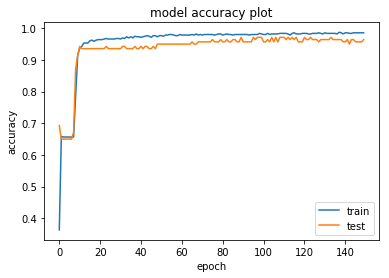

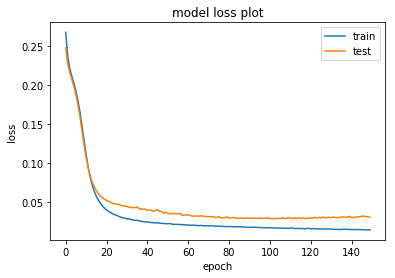

In [9]:
#Create Neural network model
model = Sequential()
model.add(Dense(9,input_dim = 9,activation='sigmoid'))
model.add(Dense(9,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

start_time = time.time()
#Train the model with trining data and evaluate against test data
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 10, epochs = 150,verbose =0)
end_time = time.time()

# Test model on testing data
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\nTime taken:", format(end_time - start_time))

# Plot accuracy result
plt.plot(history.history['acc'])
plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Plot loss result
plt.plot(history.history['loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Activation - Relu

140/140 [==============================] - 0s 28us/step

acc: 95.71%

loss: 4.36%

Time taken: 7.843999624252319


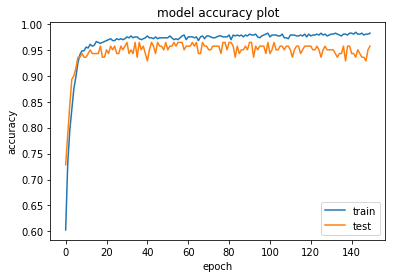

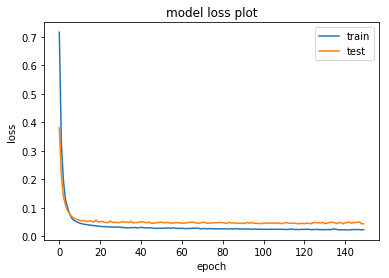

In [8]:
model1 = Sequential()
model1.add(Dense(9,input_dim = 9,activation='relu'))
model1.add(Dense(9,activation='relu'))
model1.add(Dense(1))

model1.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

start_time = time.time()
#Train the model with trining data and evaluate against test data
history = model1.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 10, epochs = 150,verbose =0)
end_time = time.time()

# Test model on testing data
scores = model1.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model1.metrics_names[0], scores[0]*100))
print("\nTime taken:", format(end_time - start_time))

# Plot accuracy result
plt.plot(history.history['acc'])
plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Plot loss result
plt.plot(history.history['loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()